# 🌤️ Klasifikasi Prakiraan Cuaca


In [1]:

import numpy as np
import pandas as pd                            

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split            
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.preprocessing import MinMaxScaler,  StandardScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

from sklearn.linear_model import LogisticRegression               
from sklearn.ensemble import RandomForestClassifier                   


from sklearn.pipeline import Pipeline
from sklearn.base import clone
import time

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)


## **Loading Data**

In [2]:
df_cuaca = pd.read_csv('dpc.csv',header=0)

df_cuaca.head()  

,Suhu (°C),Kelembapan (%),Tekanan (hPa),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Kelembapan Tanah (%),pH Tanah,Prakiraan Cuaca
0,25.71,96.1,959.4,14.1,28.86,57.7,333.0,252.9,31.2,6.44,Hujan
1,32.25,51.7,988.1,22.5,17.44,26.6,104.2,104.3,14.0,4.07,Cerah
2,26.94,89.7,975.6,27.1,35.94,NaN,288.2,301.9,40.0,4.04,Hujan
3,25.34,76.0,983.1,15.3,25.56,18.4,729.5,19.2,31.7,6.24,Hujan
4,34.25,46.7,959.8,3.9,0.21,27.3,487.5,223.3,59.0,6.68,Cerah


In [3]:
print("Jumlah baris, kolom:", df_cuaca.shape)  
print("\nTipe data:")
print(df_cuaca.dtypes)

Jumlah baris, kolom: (800, 11)

Tipe data:
Suhu (°C)                   float64
Kelembapan (%)              float64
Tekanan (hPa)               float64
Kecepatan Angin (km/jam)    float64
Curah Hujan (mm)            float64
Awan (%)                    float64
Radiasi Matahari (W/m²)     float64
Ketinggian (mdpl)           float64
Kelembapan Tanah (%)        float64
pH Tanah                    float64
Prakiraan Cuaca              object
dtype: object


In [4]:
df_cuaca = df_cuaca.drop(columns=['Tekanan (hPa)', 'pH Tanah', 'Kelembapan Tanah (%)'], errors='ignore')

# Tampilkan 5 baris pertama untuk verifikasi
df_cuaca.head()

,Suhu (°C),Kelembapan (%),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Prakiraan Cuaca
0,25.71,96.1,14.1,28.86,57.7,333.0,252.9,Hujan
1,32.25,51.7,22.5,17.44,26.6,104.2,104.3,Cerah
2,26.94,89.7,27.1,35.94,NaN,288.2,301.9,Hujan
3,25.34,76.0,15.3,25.56,18.4,729.5,19.2,Hujan
4,34.25,46.7,3.9,0.21,27.3,487.5,223.3,Cerah


## **Pembersihan Data & Tangani Missing Value & Nan**

In [5]:
# (1) Cek nilai NULL
print("\nJumlah nilai kosong (null) per kolom:\n", df_cuaca.isnull().sum())

# (2) Cek nilai NaN
nan_counts = df_cuaca.isna().sum()
print("\nJumlah nilai NaN per kolom:\n", nan_counts)



Jumlah nilai kosong (null) per kolom:
 Suhu (°C)                   40
Kelembapan (%)              40
Kecepatan Angin (km/jam)     0
Curah Hujan (mm)            40
Awan (%)                    40
Radiasi Matahari (W/m²)      0
Ketinggian (mdpl)            0
Prakiraan Cuaca              0
dtype: int64

Jumlah nilai NaN per kolom:
 Suhu (°C)                   40
Kelembapan (%)              40
Kecepatan Angin (km/jam)     0
Curah Hujan (mm)            40
Awan (%)                    40
Radiasi Matahari (W/m²)      0
Ketinggian (mdpl)            0
Prakiraan Cuaca              0
dtype: int64


In [6]:
median_suhu = df_cuaca['Suhu (°C)'].median()
median_awan = df_cuaca['Awan (%)'].median()

# Isi nilai NaN dengan median
df_cuaca['Suhu (°C)'] = df_cuaca['Suhu (°C)'].fillna(median_suhu)
df_cuaca['Awan (%)'] = df_cuaca['Awan (%)'].fillna(median_awan)
df_cuaca['Kelembapan (%)'] = df_cuaca['Kelembapan (%)'].fillna(median_awan)
df_cuaca['Curah Hujan (mm)'] = df_cuaca['Curah Hujan (mm)'].fillna(median_awan)

# Tampilkan hasil median
print("Median Suhu (°C):", median_suhu)
print("Median Awan (%):", median_awan)

# Cek kembali apakah masih ada NaN
print("\nJumlah nilai kosong setelah penanganan:")
print(df_cuaca.isnull().sum())

Median Suhu (°C): 27.43
Median Awan (%): 49.849999999999994

Jumlah nilai kosong setelah penanganan:
Suhu (°C)                   0
Kelembapan (%)              0
Kecepatan Angin (km/jam)    0
Curah Hujan (mm)            0
Awan (%)                    0
Radiasi Matahari (W/m²)     0
Ketinggian (mdpl)           0
Prakiraan Cuaca             0
dtype: int64


In [7]:
# Validasi ulang
print("\nSetelah imputasi, nilai kosong per kolom:\n", df_cuaca.isnull().sum())


Setelah imputasi, nilai kosong per kolom:
 Suhu (°C)                   0
Kelembapan (%)              0
Kecepatan Angin (km/jam)    0
Curah Hujan (mm)            0
Awan (%)                    0
Radiasi Matahari (W/m²)     0
Ketinggian (mdpl)           0
Prakiraan Cuaca             0
dtype: int64


## **Pembersihan Data Cek & Hapus Duplikat**

In [8]:
before = df_cuaca.shape
dupes = df_cuaca[df_cuaca.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_cuaca2 = df_cuaca.drop_duplicates(keep='first')
print("Bentuk data sebelum/sesudah hapus duplikat:", before, "->", df_cuaca.shape)


Jumlah baris duplikat (terhitung ganda): 0
Bentuk data sebelum/sesudah hapus duplikat: (800, 8) -> (800, 8)


## **Pembersihan Data Cek & Hapus Outlier**

In [9]:

# Deteksi OUTLIER dengan metode IQR 
df_cuaca3 = df_cuaca2.select_dtypes(include=[np.number])  
Q1 = df_cuaca3.quantile(0.25)
Q3 = df_cuaca3.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_cuaca3 < (Q1 - 1.5 * IQR)) | (df_cuaca3 > (Q3 + 1.5 * IQR))).any(axis=1)
print("\nJumlah baris yang terdeteksi memiliki outlier:", outliers.sum())

# Hapus baris yang memiliki outlier
df_cuaca_clean = df_cuaca2.loc[~outliers]
print("Ukuran Data Asli:", df_cuaca2.shape)
print("Ukuran Data Setelah Outlier Dihapus:", df_cuaca_clean.shape)
print("Jumlah baris yang dihapus:", outliers.sum())


Jumlah baris yang terdeteksi memiliki outlier: 0
Ukuran Data Asli: (800, 8)
Ukuran Data Setelah Outlier Dihapus: (800, 8)
Jumlah baris yang dihapus: 0


##  **Encode Label & Pisahkan Fitur–Target**


In [10]:
# ===============================
# Encode Label & Pisahkan Fitur–Target
# ===============================

# Hujan   → 0 (Cuaca Hujan)
# Cerah   → 1 (Cuaca Cerah)

# Mengubah label prakiraan cuaca dari huruf menjadi angka
df_cuaca2['Prakiraan Cuaca'] = df_cuaca2['Prakiraan Cuaca'].map({'Hujan': 0, 'Cerah': 1})

# Menentukan X sebagai fitur (semua kolom kecuali 'Prakiraan Cuaca')
X = df_cuaca2.drop(columns=['Prakiraan Cuaca'])

# Menentukan y sebagai target (kolom 'Prakiraan Cuaca')
y = df_cuaca2['Prakiraan Cuaca']

# Menampilkan 5 baris pertama dataframe setelah perubahan
df_cuaca2.head()


,Suhu (°C),Kelembapan (%),Kecepatan Angin (km/jam),Curah Hujan (mm),Awan (%),Radiasi Matahari (W/m²),Ketinggian (mdpl),Prakiraan Cuaca
0,25.71,96.1,14.1,28.86,57.70,333.0,252.9,0
1,32.25,51.7,22.5,17.44,26.60,104.2,104.3,1
2,26.94,89.7,27.1,35.94,49.85,288.2,301.9,0
3,25.34,76.0,15.3,25.56,18.40,729.5,19.2,0
4,34.25,46.7,3.9,0.21,27.30,487.5,223.3,1


## **Pembagian Data: Train/Test Split**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 45, stratify=y
)                                                           
print("Ukuran X_train, X_test:", X_train.shape, X_test.shape)

Ukuran X_train, X_test: (560, 7) (240, 7)


##  **Membangun Model Logistic Regression dengan Pipeline + GridSearchCV**

In [12]:
# ============================================================
#  PIPELINE: Scaling → Feature Selection → Logistic Regression
# ============================================================

# Rancang pipeline: gabungkan preprocessing + feature selection + model
pipe_lr = Pipeline(steps=[
    ('scaler', MinMaxScaler()),             
    ('feat_select', SelectKBest()),       
    ('clf', LogisticRegression(      # model klasifikasi
        class_weight='balanced',        
        solver='liblinear',              
        max_iter=500              
    ))
])

# GridSearch: daftar kombinasi parameter yang akan diuji
params_grid_lr = [
    {
        'feat_select__k': np.arange(2, 10),             
        'clf__penalty': ['l1', 'l2'],                  
        'clf__C': [0.01, 0.1, 1, 10],                   
    },
    {
        'feat_select': [SelectPercentile()],                # alternatif: seleksi berdasar persentase
        'feat_select__percentile': np.arange(20, 80, 10),
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.01, 0.1, 1, 10],
    }
]

# Stratified K-Fold: menjaga proporsi label seimbang di setiap fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Jalankan GridSearchCV untuk mencari kombinasi parameter terbaik
gscv_lr = GridSearchCV(
    pipe_lr,
    params_grid_lr,
    cv=SKF,
    scoring='f1',       # metrik utama: F1-score
    verbose=1,          # tampilkan progres selama proses
    n_jobs=-1           # gunakan semua core CPU
)

print("Menjalankan GridSearch untuk Logistic Regression...")
start = time.time()
gscv_lr.fit(X_train, y_train)
print(f"GridSearch Logistic Regression selesai dalam {time.time() - start:.2f} detik")


Menjalankan GridSearch untuk Logistic Regression...
Fitting 5 folds for each of 112 candidates, totalling 560 fits
GridSearch Logistic Regression selesai dalam 6.57 detik


## EVALUASI Model Logistic Regression

CV Score (F1) terbaik: 0.923510290516842
Kombinasi model terbaik: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('feat_select', SelectKBest(k=np.int64(5))),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced', max_iter=500,
                                    penalty='l1', solver='liblinear'))])

Skor Test (akurasi) Logistic Regression: 0.9458333333333333

Fitur terbaik (terpilih): ['Suhu (°C)' 'Kecepatan Angin (km/jam)' 'Awan (%)'
 'Radiasi Matahari (W/m²)' 'Ketinggian (mdpl)']


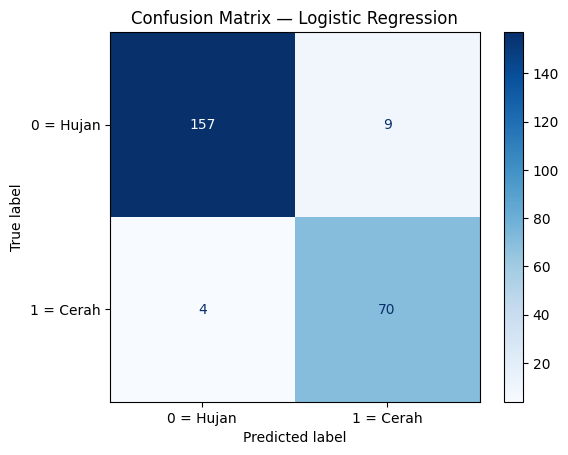


Classification Report — Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       166
           1       0.89      0.95      0.92        74

    accuracy                           0.95       240
   macro avg       0.93      0.95      0.94       240
weighted avg       0.95      0.95      0.95       240



In [13]:
# Tampilkan hasil terbaik dari GridSearch
print("CV Score (F1) terbaik:", gscv_lr.best_score_)
print("Kombinasi model terbaik:", gscv_lr.best_estimator_)

# Hitung akurasi model terbaik pada data uji
lr_test_score = gscv_lr.best_estimator_.score(X_test, y_test)
print("\nSkor Test (akurasi) Logistic Regression:", lr_test_score)

# Tampilkan fitur terbaik (jika feature selector mendukung metode get_support)
selector = gscv_lr.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# Buat prediksi pada data uji dan tampilkan Confusion Matrix
lr_pred = gscv_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0 = Hujan','1 = Cerah'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix — Logistic Regression")
plt.show()

# Tampilkan classification report (precision, recall, f1-score)
print("\nClassification Report — Logistic Regression:\n", classification_report(y_test, lr_pred))


##  **Membangun Model Random Forest dengan Pipeline + GridSearchCV**

In [14]:
# ============================================================
#  PIPELINE: Scaling → Feature Selection → Random Forest
# ============================================================


# Rancang pipeline: gabungkan scaling, seleksi fitur, dan model Random Forest
pipe_rf = Pipeline(steps=[
    ('scaling', MinMaxScaler()),              
    ('feat_select', SelectKBest()),             
    ('clf', RandomForestClassifier(      
        class_weight='balanced',       
        random_state=42,             
        n_estimators=-1                    
    ))
])

# GridSearch: dua jenis seleksi fitur (KBest dan Percentile) dengan kombinasi parameter model
params_grid_rf = [
    # Kandidat 1: pakai SelectKBest
    {
        'feat_select__k': np.arange(5, 15),        # jumlah fitur terbaik yang diuji
        'clf__n_estimators': [200, 300, 500],      # jumlah pohon
        'clf__max_depth': [None, 5, 10],           # batas kedalaman tiap pohon
        'clf__min_samples_split': [2, 5, 10]       # jumlah minimal sampel untuk split node
    },
    # Kandidat 2: pakai SelectPercentile
    {
        'feat_select': [SelectPercentile()],
        'feat_select__percentile': np.arange(30, 80, 10),
        'clf__n_estimators': [200, 300, 500],
        'clf__max_depth': [None, 5, 10],
        'clf__min_samples_split': [2, 5, 10]
    }
]

# StratifiedKFold: memastikan proporsi kelas tetap sama di setiap fold CV
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)                

# Jalankan GridSearchCV: mencari kombinasi parameter terbaik dengan metrik F1
gscv_rf = GridSearchCV(
    pipe_rf,                 
    params_grid_rf,          
    cv=SKF,                 
    scoring='f1',            
    verbose=1,              
    n_jobs=-1                
)

print("Menjalankan GridSearch untuk Random Forest...")
start = time.time()

gscv_rf.fit(X_train, y_train)      

print(f"GridSearch Random Forest selesai dalam {time.time() - start:.2f} detik")


Menjalankan GridSearch untuk Random Forest...
Fitting 5 folds for each of 405 candidates, totalling 2025 fits
GridSearch Random Forest selesai dalam 136.35 detik



## EVALUASI

CV Score (F1) terbaik: 0.9882340217073201
Kombinasi model terbaik: Pipeline(steps=[('scaling', MinMaxScaler()),
                ('feat_select', SelectPercentile(percentile=np.int64(30))),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])

Skor Test (akurasi) Random Forest: 0.9833333333333333

Fitur terbaik (terpilih): ['Suhu (°C)' 'Awan (%)']


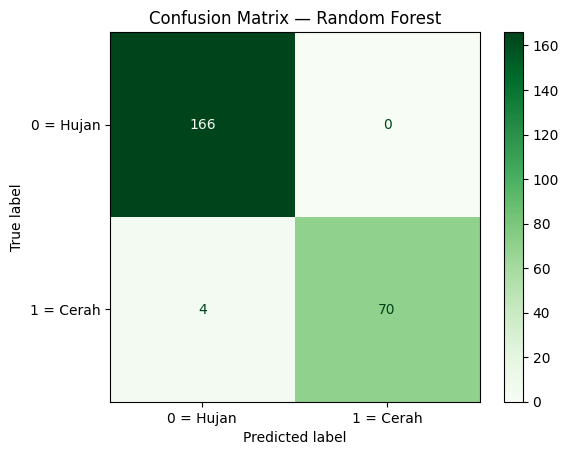


Classification Report — Random Forest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       166
           1       1.00      0.95      0.97        74

    accuracy                           0.98       240
   macro avg       0.99      0.97      0.98       240
weighted avg       0.98      0.98      0.98       240



In [15]:
#  Evaluasi hasil GridSearch
print("CV Score (F1) terbaik:", gscv_rf.best_score_)
print("Kombinasi model terbaik:", gscv_rf.best_estimator_)     

rf_test_score = gscv_rf.best_estimator_.score(X_test, y_test) 
print("\nSkor Test (akurasi) Random Forest:", rf_test_score)  

#  Fitur terbaik (jika selector mendukung get_support)
selector = gscv_rf.best_estimator_.named_steps['feat_select']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

#  Confusion Matrix & Classification Report
rf_pred = gscv_rf.predict(X_test)              
cm_rf = confusion_matrix(y_test, rf_pred)     
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['0 = Hujan','1 = Cerah'])  
disp_rf.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Random Forest")
plt.show()

print("\nClassification Report — Random Forest:\n", classification_report(y_test, rf_pred))  


## **Langkah Akhir — Visualisasi Perbandingan Tiga Model Terbaik**

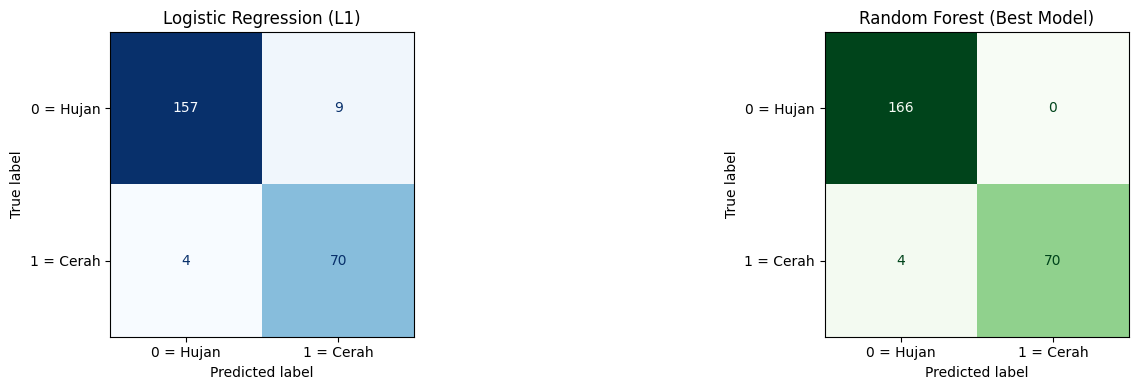

In [16]:
# Buat figure dengan 2 subplot berdampingan (1 baris, 3 kolom)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 4))

# Plot Confusion Matrix untuk Logistic Regression
disp_lr.plot(ax=ax1, cmap=plt.cm.Blues, colorbar=False)
ax1.set_title("Logistic Regression (L1)")   # judul subplot pertama

# Plot Confusion Matrix untuk Random Forest
disp_rf.plot(ax=ax2, cmap=plt.cm.Greens, colorbar=False)
ax2.set_title("Random Forest (Best Model)") # judul subplot ketiga

# Rapikan tata letak agar subplot tidak tumpang tindih
plt.tight_layout()
plt.show()  # tampilkan semua plot


In [17]:
import pickle  

# Simpan pipeline terbaik (bukan hanya model clf)
best_rf_pipeline = gscv_rf.best_estimator_

# Simpan pipeline lengkap ke file pickle
with open("BestModel_CLF_RandomForest_pingouin.pkl", "wb") as f:
    pickle.dump(best_rf_pipeline, f)

print("✅ Pipeline Random Forest terbaik berhasil disimpan ke 'BestModel_CLF_RandomForest_pingouin.pkl'")


✅ Pipeline Random Forest terbaik berhasil disimpan ke 'BestModel_CLF_RandomForest_pingouin.pkl'
